In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [ ]:
colleges = pd.read_csv("/content/drive/MyDrive/BAC/college_data.csv")

In [ ]:
colleges['Early Career Pay'] = colleges['Early Career Pay'].replace('[\$,]', '', regex=True).astype(float)
colleges['Mid-Career Pay'] = colleges['Mid-Career Pay'].replace('[\$,]', '', regex=True).astype(float)
colleges['% High Meaning'] = colleges['% High Meaning'].replace('[\%,]', '', regex=True).astype(float)
colleges['% STEM Degrees'] = colleges['% STEM Degrees'].replace('[\%,]', '', regex=True).astype(float)

In [ ]:
colleges.head()

,Rank,School Name,School Type,Region,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM Degrees
0,1,Princeton University,Ivy League,Northeastern,93000.0,189400.0,50.0,51.0
1,1,Williams College,Private School,Northeastern,81900.0,169200.0,38.0,36.0
2,2,Massachusetts Institute of Technology,Private School,Northeastern,106400.0,189400.0,49.0,66.0
3,3,United States Naval Academy,State School,Northeastern,94200.0,181500.0,52.0,53.0
4,3,Stanford University,Private School,California,98900.0,177500.0,57.0,52.0


In [ ]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              404 non-null    int64  
 1   School Name       404 non-null    object 
 2   School Type       404 non-null    object 
 3   Region            404 non-null    object 
 4   Early Career Pay  404 non-null    float64
 5   Mid-Career Pay    404 non-null    float64
 6   % High Meaning    404 non-null    float64
 7   % STEM Degrees    404 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 25.4+ KB


In [ ]:
colleges['School Type'].value_counts()

State School      210
Private School    186
Ivy League          8
Name: School Type, dtype: int64

In [ ]:
colleges['Region'].value_counts()

Southern        132
Northeastern    113
Midwestern      100
California       33
Western          26
Name: Region, dtype: int64

In [ ]:
average_salary = colleges['Mid-Career Pay'].mean()
average_salary

118394.30693069307

In [ ]:
median_salary = colleges['Mid-Career Pay'].median()
median_salary

113800.0

In [ ]:
min = colleges['Mid-Career Pay'].min()
min_index = colleges['Mid-Career Pay'].idxmin()
min_school = colleges.loc[min_index]['School Name']

print(min)
print(min_school)

74000.0
Keiser University-Ft Lauderdale


In [ ]:
max = colleges['Mid-Career Pay'].max()
max_index = colleges['Mid-Career Pay'].idxmax()
max_school = colleges.loc[max_index]['School Name']

print(max)
print(max_school)

189400.0
Princeton University


<Axes: xlabel='Mid-Career Pay'>

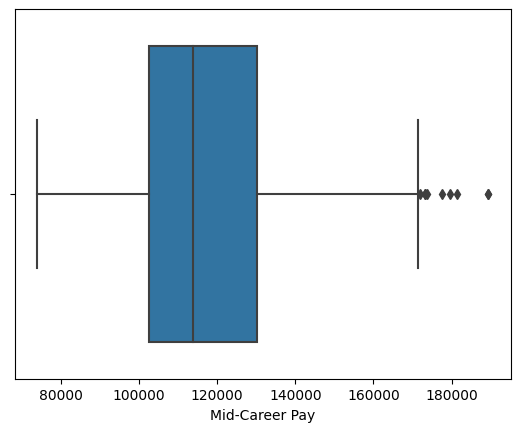

In [ ]:
sns.boxplot(data = colleges, x = 'Mid-Career Pay')

<Axes: xlabel='Rank', ylabel='Mid-Career Pay'>

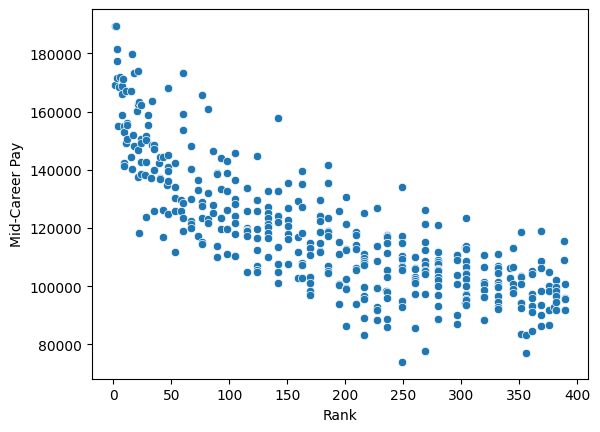

In [ ]:
sns.scatterplot(data = colleges, x = 'Rank', y = 'Mid-Career Pay')

<Axes: xlabel='School Type', ylabel='Mid-Career Pay'>

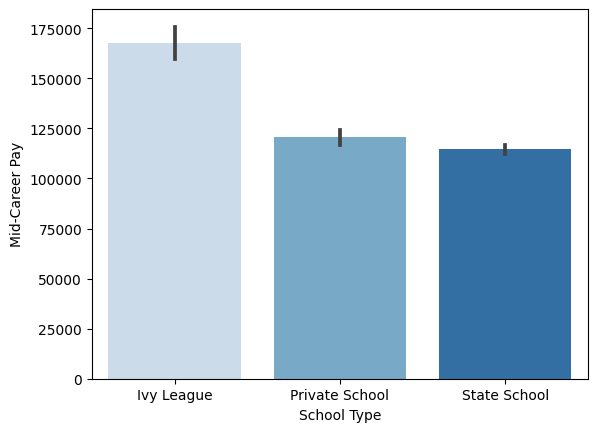

In [ ]:
sns.barplot(data = colleges, x = 'School Type', y = 'Mid-Career Pay', palette = 'Blues')

<Axes: xlabel='Region', ylabel='Mid-Career Pay'>

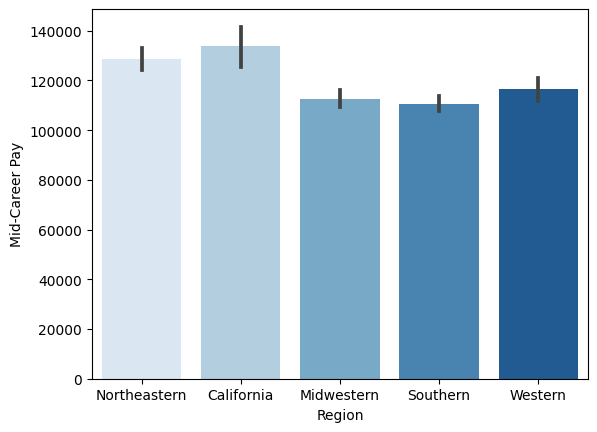

In [ ]:
sns.barplot(data = colleges, x = 'Region', y = 'Mid-Career Pay', palette = 'Blues')

<Axes: xlabel='% High Meaning', ylabel='Mid-Career Pay'>

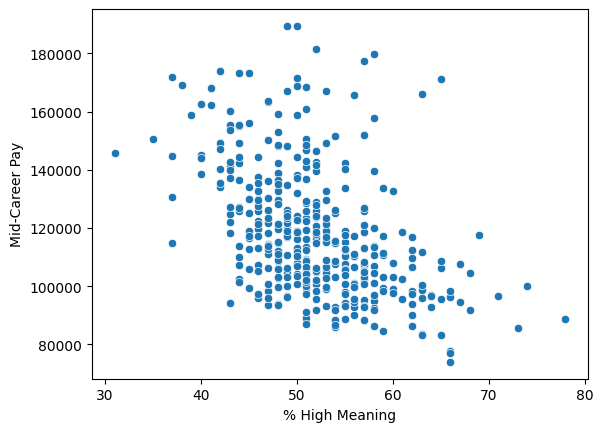

In [ ]:
sns.scatterplot(data = colleges, x = '% High Meaning', y = 'Mid-Career Pay')

<Axes: xlabel='% STEM Degrees', ylabel='Mid-Career Pay'>

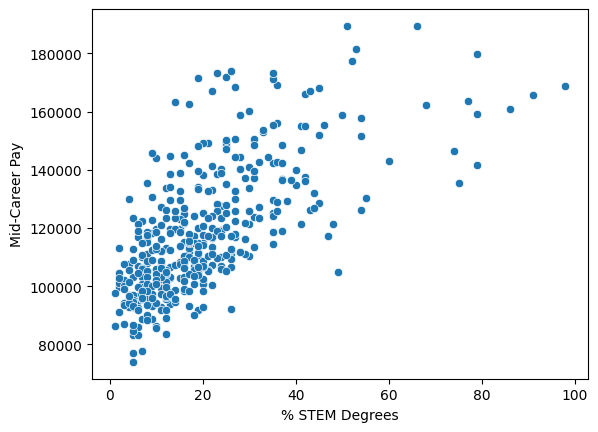

In [ ]:
sns.scatterplot(data = colleges, x = '% STEM Degrees', y = 'Mid-Career Pay')

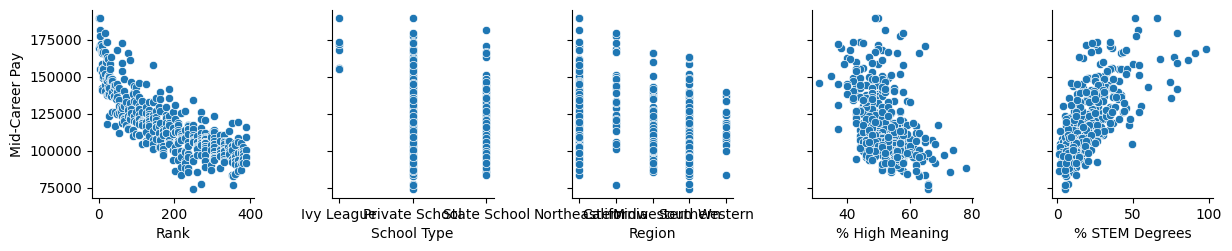

In [ ]:
x_vars = ['Rank', 'School Type', 'Region', '% High Meaning', '% STEM Degrees']

sns.pairplot(data = colleges, x_vars = x_vars, y_vars = 'Mid-Career Pay')

In [ ]:
X = colleges[['Rank']]
y = colleges['Mid-Career Pay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("The y intercept:", lr.intercept_)
print("The single coefficient:", lr.coef_)

y_preds = lr.predict(X_test)
print("R^2: ", metrics.r2_score(y_test, y_preds))

print("MSE: ", metrics.mean_squared_error(y_test, y_preds))

The y intercept: 145072.36978697655
The single coefficient: [-147.04177572]
R^2:  0.6843455943787776
MSE:  169891033.08629745


<Axes: xlabel='Rank', ylabel='Mid-Career Pay'>

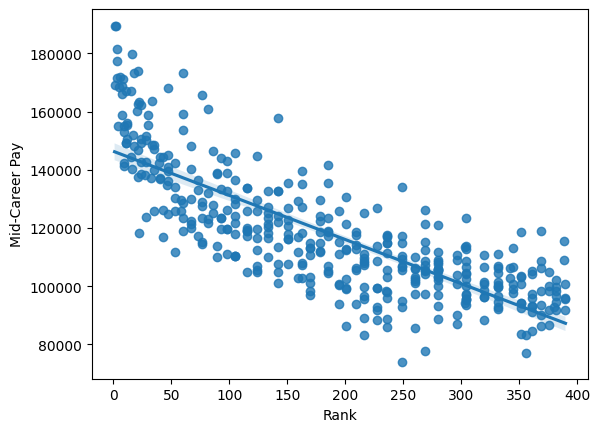

In [ ]:
sns.regplot(data = colleges, x = 'Rank', y = 'Mid-Career Pay')

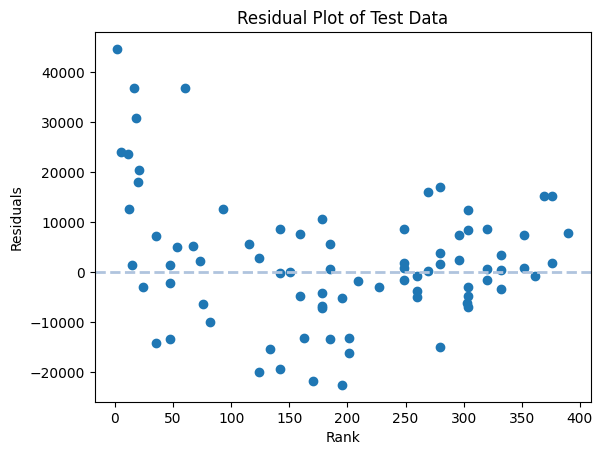

In [ ]:
residuals = y_test - y_preds
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='lightsteelblue', linestyle='--', linewidth=2)
plt.title('Residual Plot of Test Data')
plt.xlabel('Rank')
plt.ylabel('Residuals')
plt.show()

first 30: [-969.83999824]
first 30: 171611.44813660506
30-175: [-199.5301945]
30-175: 146708.644523562
after 175: [-73.13076722]
after 175: 124455.25404959981


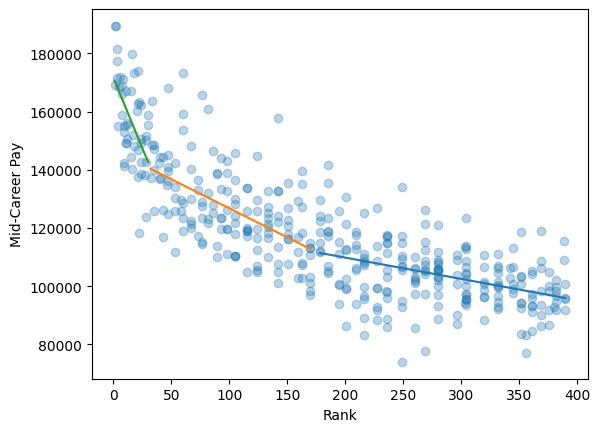

In [ ]:
#first 30
first_30 = colleges[colleges['Rank'] <= 30]
X_first_30 = first_30[['Rank']]
y_first_30 = first_30['Mid-Career Pay']

lr = LinearRegression()
lr.fit(X_first_30, y_first_30)
y_preds_first_30 = lr.predict(X_first_30)

#30-175
second_150 = colleges[(colleges['Rank'] > 30) & (colleges['Rank'] <= 175)]

X_second_150 = second_150[['Rank']]
y_second_150 = second_150['Mid-Career Pay']

lr2 = LinearRegression()

lr2.fit(X_second_150, y_second_150)
y_preds_second_150 = lr2.predict(X_second_150)

#175+
after_175 = colleges[colleges['Rank'] > 175]

X_after_175 = after_175[['Rank']]
y_after_175 = after_175['Mid-Career Pay']

lr3 = LinearRegression()

lr3.fit(X_after_175, y_after_175)
y_preds_after_175 = lr3.predict(X_after_175)

plt.scatter(colleges['Rank'], colleges['Mid-Career Pay'], alpha = 0.3)
plt.plot(X_after_175, y_preds_after_175)
plt.plot(X_second_150, y_preds_second_150)
plt.plot(X_first_30,y_preds_first_30)
plt.xlabel("Rank")
plt.ylabel("Mid-Career Pay")

print('first 30:', lr.coef_)
print('first 30:', lr.intercept_)
print('30-175:', lr2.coef_)
print('30-175:', lr2.intercept_)
print('after 175:', lr3.coef_)
print('after 175:', lr3.intercept_)

In [ ]:
X = colleges[['% High Meaning']]
y = colleges['Mid-Career Pay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("The y intercept:", lr.intercept_)
print("The single coefficient:", lr.coef_)

y_preds = lr.predict(X_test)
print("R^2: ", metrics.r2_score(y_test, y_preds))

print("MSE: ", metrics.mean_squared_error(y_test, y_preds))

The y intercept: 195378.4744137212
The single coefficient: [-1483.1499633]
R^2:  0.3379267970434918
MSE:  317672658.41754544


<Axes: xlabel='% High Meaning', ylabel='Mid-Career Pay'>

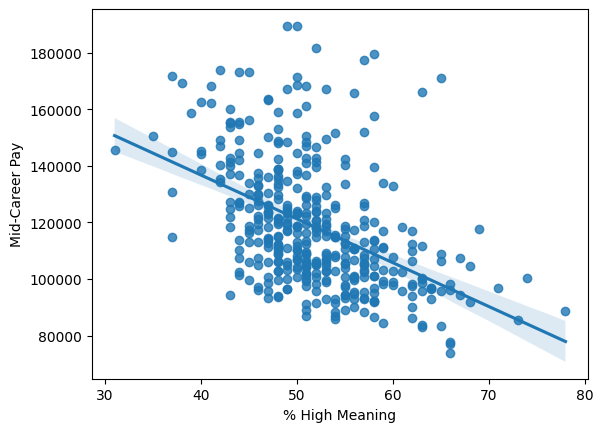

In [ ]:
sns.regplot(data = colleges, x = '% High Meaning', y = 'Mid-Career Pay')

In [ ]:
X = colleges[['% STEM Degrees']]
y = colleges['Mid-Career Pay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("The y intercept:", lr.intercept_)
print("The single coefficient:", lr.coef_)

y_preds = lr.predict(X_test)
print("R^2: ", metrics.r2_score(y_test, y_preds))

print("MSE: ", metrics.mean_squared_error(y_test, y_preds))

The y intercept: 98311.21602489686
The single coefficient: [996.30415565]
R^2:  0.508742657720024
MSE:  235913838.1859265


<Axes: xlabel='% STEM Degrees', ylabel='Mid-Career Pay'>

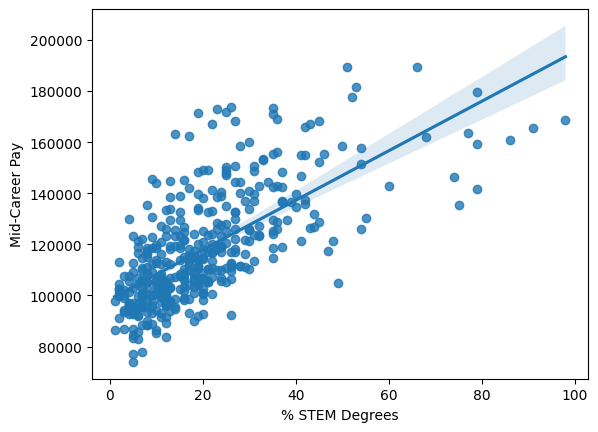

In [ ]:
sns.regplot(data = colleges, x = '% STEM Degrees', y = 'Mid-Career Pay')

In [ ]:
X = colleges[['School Type']]
y = colleges['Mid-Career Pay']

encoder = OneHotEncoder(sparse=False, drop = 'first')
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("The y intercept:", lr.intercept_)
print("The coefficients (Private School compared to Ivy League, Public School compared to Ivy League):", lr.coef_)

y_preds = lr.predict(X_test)

print("R^2: ", metrics.r2_score(y_test, y_preds))
print("MSE: ", metrics.mean_squared_error(y_test, y_preds))

The y intercept: 168599.99999999997
The coefficients (Private School compared to Ivy League, Public School compared to Ivy League): [-48590.         -53546.42857143]
R^2:  0.1912108811494856
MSE:  435305246.8253967


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = colleges[['Region']]
y = colleges['Mid-Career Pay']

encoder = OneHotEncoder(sparse=False, drop = 'first')
X_encoded = encoder.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)

print("The y intercept:", lr.intercept_)
print("The coefficients ():", lr.coef_)

y_preds = lr.predict(X_test)

print("R^2: ", metrics.r2_score(y_test, y_preds))
print("MSE: ", metrics.mean_squared_error(y_test, y_preds))

The y intercept: 135762.5
The coefficients (): [-21818.05555556  -7880.35714286 -24520.39473684 -18467.5       ]
R^2:  0.21221142431979534
MSE:  378315417.5471277


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_mult = colleges[['Rank', 'School Type', 'Region', '% High Meaning', '% STEM Degrees']]
y_mult = colleges['Mid-Career Pay']

X_train, X_test, y_train, y_test = train_test_split(X_mult, y_mult, test_size = 0.2, random_state = 8)

cat_cols = ['School Type','Region']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_cols), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

mult_lr = LinearRegression()
mult_lr.fit(X_train_encoded, y_train)

y_preds = mult_lr.predict(X_test_encoded)

r_squared = metrics.r2_score(y_test, y_preds)

n = len(y_test)
k = X_test_encoded.shape[1]

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("The y intercept:", mult_lr.intercept_)
print("R^2:", r_squared)
print("Adjusted R^2:", adjusted_r_squared)
print("MSE:", metrics.mean_squared_error(y_test, y_preds))

The y intercept: 162076.90597800378
R^2: 0.8399227241185592
Adjusted R^2: 0.8144031583983294
MSE: 94696604.96666585


In [ ]:
coefficients = mult_lr.coef_
names = encoder.get_feature_names_out()

pd.DataFrame(coefficients, names)

,0
School Type_Ivy League,12920.871104
School Type_Private School,-3449.625964
School Type_State School,-9471.245140
Region_California,5548.724560
Region_Midwestern,-4388.409241
Region_Northeastern,-806.042351
Region_Southern,-3461.834329
Region_Western,3107.561361
Rank,-79.497019
% High Meaning,-615.084128


In [ ]:
colleges['target'] = (colleges['Mid-Career Pay'] > 125000).astype(int)

X = colleges[['Rank', 'School Type', 'Region', '% High Meaning', '% STEM Degrees']]
y = colleges['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

cat_cols = ['School Type','Region']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_cols), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train_encoded, y_train)

y_preds = lgr.predict(X_test_encoded)

print("accuracy:", lgr.score(X_test_encoded, y_test))

accuracy: 0.9012345679012346


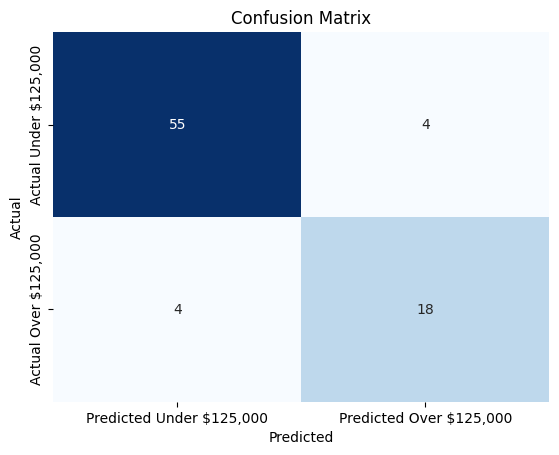

In [ ]:
conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Under $125,000', 'Predicted Over $125,000'],
            yticklabels=['Actual Under $125,000', 'Actual Over $125,000'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
coefficients = lgr.coef_[0]
names = encoder.get_feature_names_out()
pd.DataFrame(coefficients, names)

NameError: name 'lgr' is not defined

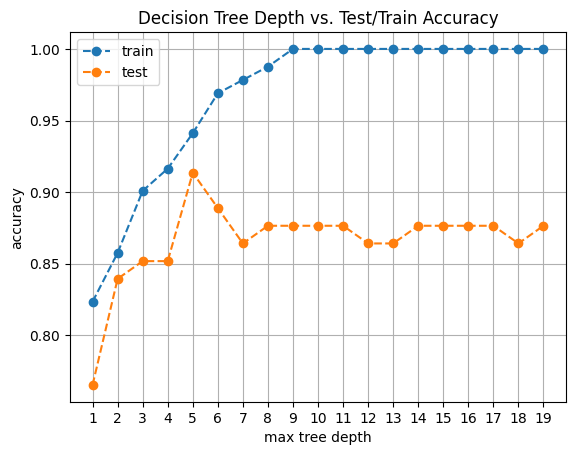

In [ ]:
colleges['target'] = (colleges['Mid-Career Pay'] > 125000).astype(int)

X = colleges[['Rank', 'School Type', 'Region', '% High Meaning', '% STEM Degrees']]
y = colleges['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

cat_cols = ['School Type','Region']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_cols), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train_encoded, y_train)
    train_scores.append(dtree.score(X_train_encoded, y_train))
    test_scores.append(dtree.score(X_test_encoded, y_test))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('accuracy')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5).fit(X_train_encoded, y_train)

y_preds = dtree.predict(X_test_encoded)

In [ ]:
dtree.score(X_test_encoded, y_test)

0.9135802469135802

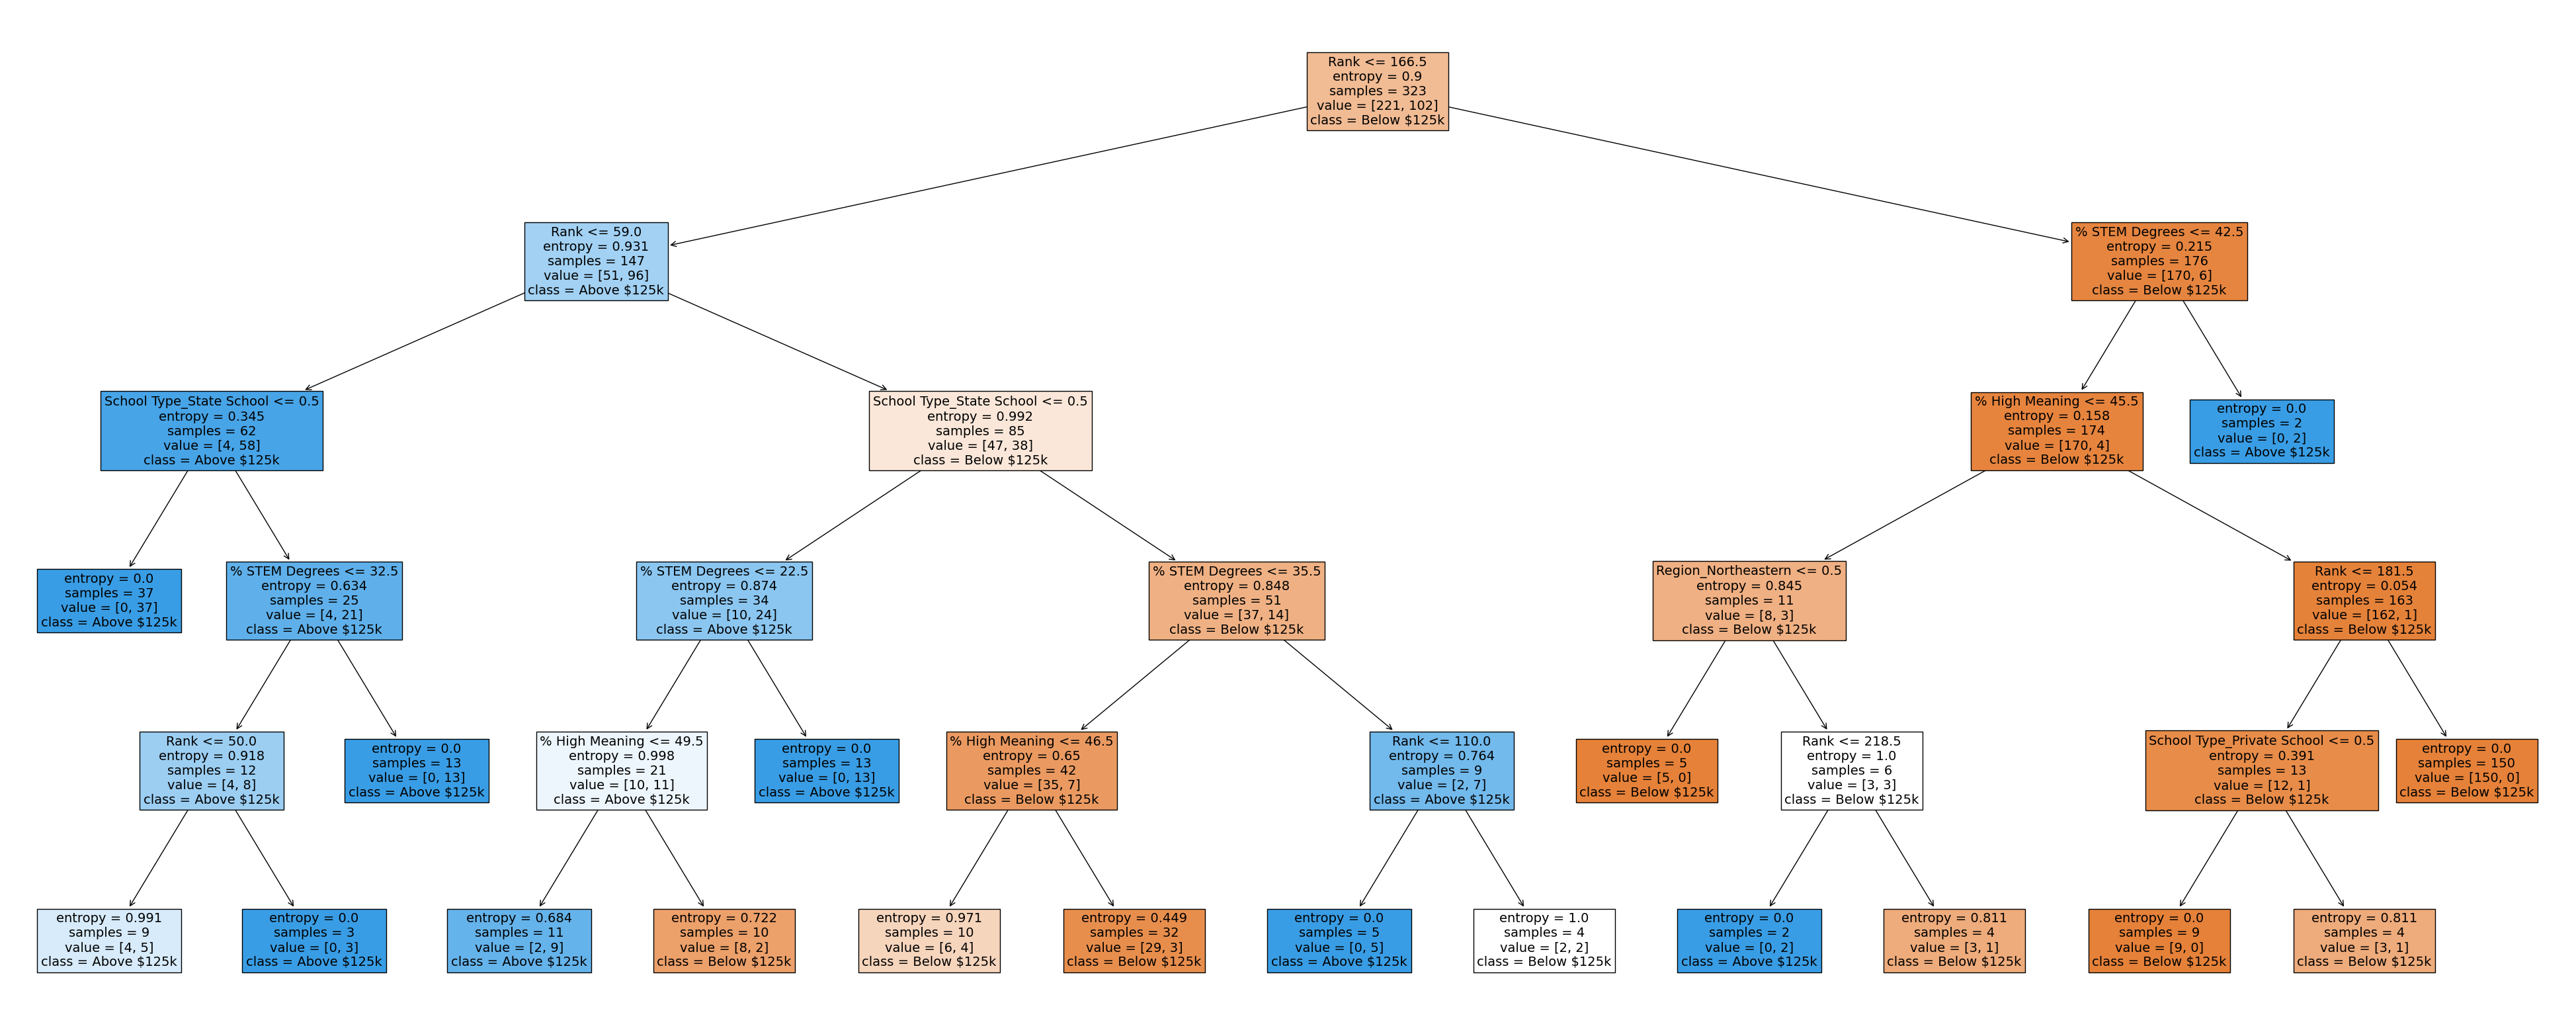

In [ ]:
plt.figure(figsize=(50, 20))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out(X.columns.tolist()), class_names=['Below $125k', 'Above $125k'], fontsize=14);

In [ ]:
feature_names=encoder.get_feature_names_out(X.columns.tolist())
feature_importances = dtree.feature_importances_
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
features.reset_index()
features.head()

,Feature,Importance
8,Rank,0.670567
10,% STEM Degrees,0.155888
9,% High Meaning,0.092923
1,School Type_Private School,0.048862
2,School Type_State School,0.031759


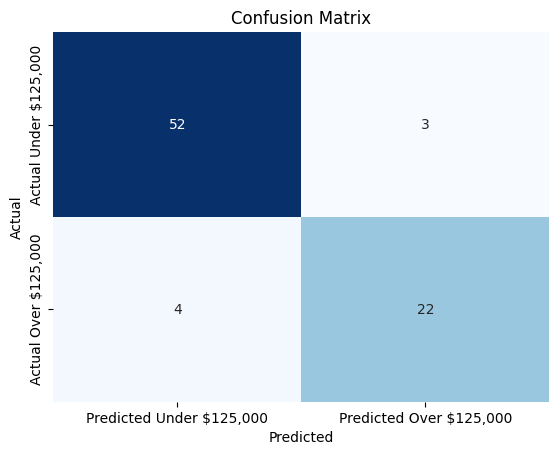

In [ ]:
conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Under $125,000', 'Predicted Over $125,000'],
            yticklabels=['Actual Under $125,000', 'Actual Over $125,000'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#random forest

X = colleges[['Rank', 'School Type', 'Region', '% High Meaning', '% STEM Degrees']]
y = colleges['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

cat_cols = ['School Type','Region']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_cols), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


rf = RandomForestClassifier(n_estimators=500, bootstrap=True, oob_score=True, random_state=12)
rf.fit(X_train_encoded, y_train)
y_preds = rf.predict(X_test_encoded)

rf.score(X_test_encoded, y_test)

0.8888888888888888

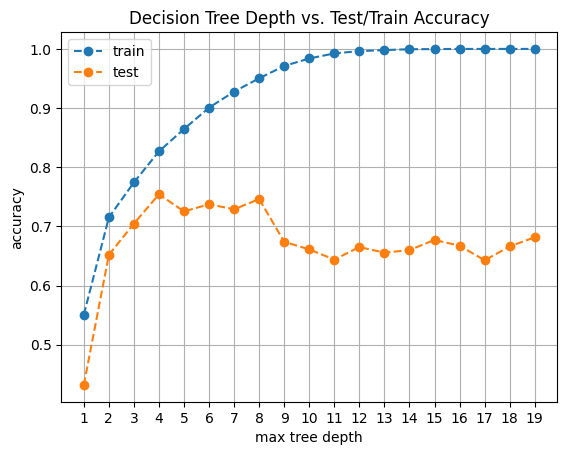

In [ ]:
#regression tree - maybe?

X = colleges[['Rank', 'School Type', 'Region', '% High Meaning', '% STEM Degrees']]
y = colleges['Mid-Career Pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

cat_cols = ['School Type','Region']
ohe = OneHotEncoder(sparse_output = False)
encoder = make_column_transformer((ohe,cat_cols), verbose_feature_names_out = False, remainder = 'passthrough')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

train_scores = []
test_scores = []
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth = d).fit(X_train_encoded, y_train)
    train_scores.append(dtree.score(X_train_encoded, y_train))
    test_scores.append(dtree.score(X_test_encoded, y_test))

plt.plot(range(1, 20), train_scores, '--o', label = 'train')
plt.plot(range(1, 20), test_scores, '--o', label = 'test')
plt.grid()
plt.legend()
plt.xticks(range(1, 20))
plt.xlabel('max tree depth')
plt.ylabel('accuracy')
plt.title('Decision Tree Depth vs. Test/Train Accuracy');

In [ ]:
dtree = DecisionTreeRegressor(max_depth = 4).fit(X_train_encoded, y_train)

y_preds = dtree.predict(X_test_encoded)

In [ ]:
dtree.score(X_test_encoded, y_test)

0.7543264427672831

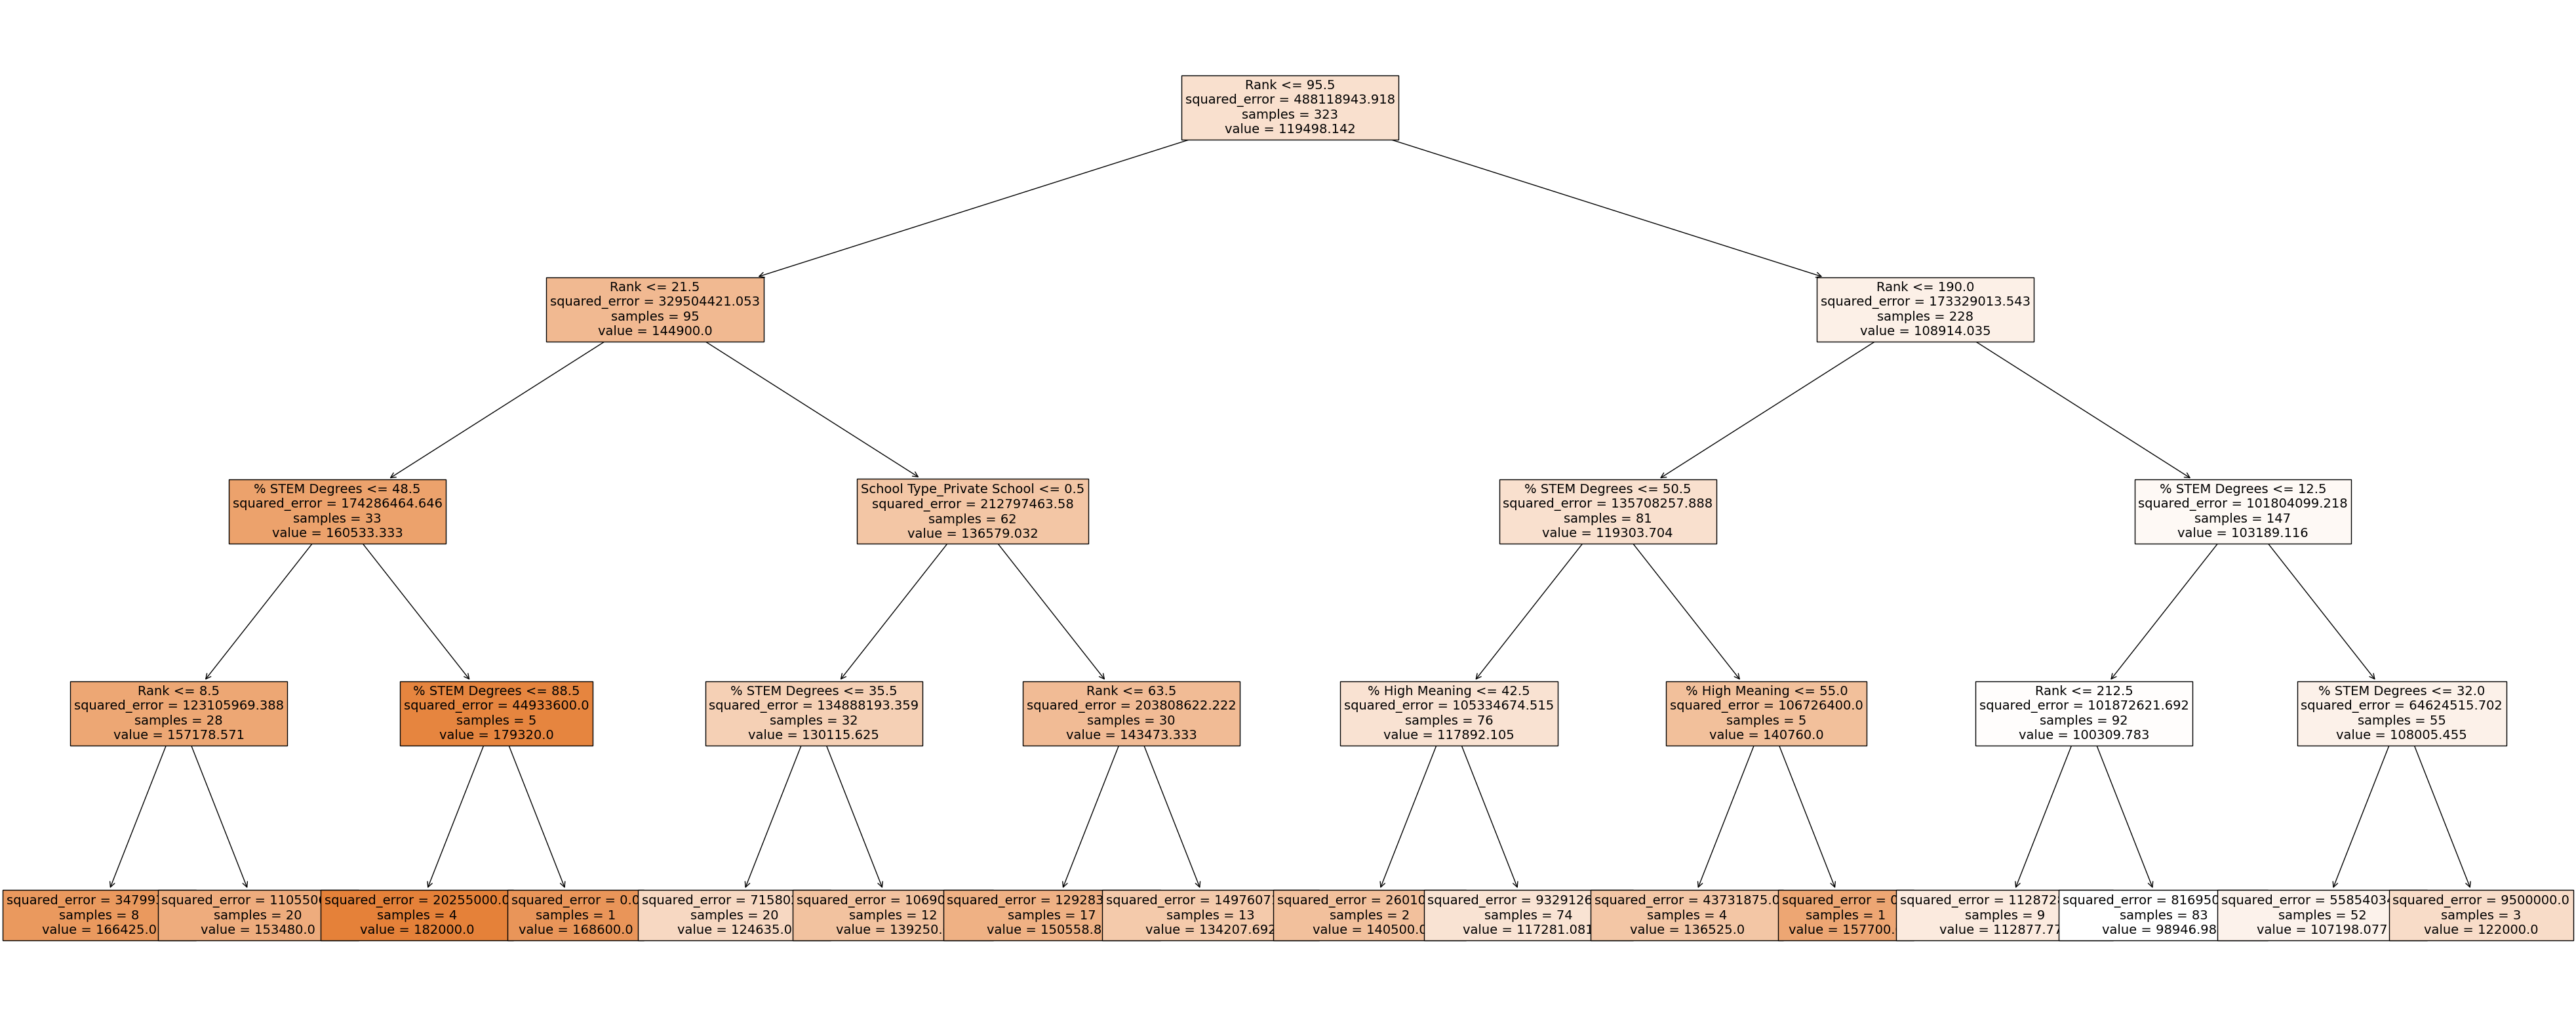

In [ ]:
plt.figure(figsize=(50, 20))
plot_tree(dtree, filled=True, feature_names=encoder.get_feature_names_out(X.columns.tolist()), fontsize=14);

In [ ]:
feature_names=encoder.get_feature_names_out(X.columns.tolist())
feature_importances = dtree.feature_importances_
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
features.reset_index()
features.head()

,Feature,Importance
8,Rank,0.899442
10,% STEM Degrees,0.068563
1,School Type_Private School,0.021191
9,% High Meaning,0.010804
0,School Type_Ivy League,0.000000
